# <center>Funções de Agregação em CNNs para Diagnóstico de Câncer de Pele: Análise Inferencial Estatística com HAM10000</center>

<center><img src="https://www.researchgate.net/publication/350356476/figure/fig6/AS:1005115947368463@1616649724991/The-general-structure-of-a-CNN-model.png"></center>

## 1. Configurações de Ambiente 

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Antes de começarmos a construir e treinar nossa rede neural, precisamos configurar nosso ambiente. Isso envolve várias etapas importantes que garantem que nosso código seja executado corretamente e nossos experimentos sejam reproduzíveis.</p>

### 1.1 Instalação e Carga de Pacotes

<div style="background-color: #f2f2f2; border-radius: 20px; margin: 10px; padding: 10px;">
<ul>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>os</strong>: Esta é uma biblioteca padrão do Python que fornece funções para interagir com o sistema operacional, incluindo a leitura de variáveis de ambiente, manipulação de diretórios e arquivos.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>warnings</strong>: Outra biblioteca padrão do Python usada para emitir avisos e controlar se eles são ignorados ou não.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>numpy</strong>: Uma biblioteca fundamental para a computação científica em Python. Ela fornece suporte para arrays multidimensionais, matrizes e uma grande coleção de funções matemáticas de alto nível.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>seaborn</strong> e <strong>matplotlib</strong>: São bibliotecas de visualização de dados em Python que fornecem uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>torchvision</strong>: Uma parte do ecossistema PyTorch, torchvision é usada para carregar e preparar conjuntos de dados de imagens, além de fornecer alguns modelos pré-treinados.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>torch</strong>: É uma biblioteca de aprendizado profundo de código aberto que fornece uma interface flexível e eficiente para algoritmos de aprendizado profundo e usa a biblioteca de matrizes Tensor do Google.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>torchmetrics</strong>: É uma biblioteca que fornece métricas para avaliação de modelos PyTorch, neste caso, a precisão da classificação.</p></li>
    <li><p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>lightning</strong>: PyTorch Lightning é uma estrutura leve que organiza o código PyTorch, fornecendo abstração para treinamento, validação, teste e previsão enquanto mantém total controle e simplicidade.</p></li>
</ul>
</div>

In [1]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00a 0:00:01


In [2]:
# Ambiente de desenvolvimento
import os 
import shutil
import warnings

# Álgebra Linear & Math
import numpy as np
import pandas as pd

# Visualização de dados
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

# Pytorch
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Subset
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset

# Métricas de Avaliação
from torchmetrics.classification import Accuracy

# Sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Lightning
import lightning as pl
from lightning.pytorch import Trainer
from lightning import LightningModule
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint

# Torchvision
import torchvision
from torchvision.models import resnet34
from torchvision.datasets import CIFAR100
from torchvision.transforms import Resize
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize
from torchvision.datasets import ImageFolder
from torchvision.transforms import ColorJitter
from torchvision.transforms import RandomRotation
from torchvision.transforms import RandomGrayscale
from torchvision.transforms import RandomResizedCrop
from torchvision.transforms import RandomPerspective
from torchvision.transforms import RandomVerticalFlip
from torchvision.transforms import RandomHorizontalFlip

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Ignorando avisos desnecessários
warnings.filterwarnings("ignore")

### 1.2 Garantindo a Reprodutibilidade dos Experimentos

In [4]:
def set_seed(seed=1996):
    # CPU
    np.random.seed(seed)
    torch.manual_seed(seed)
    pl.seed_everything(seed)
    os.environ["PYTHONHASH"] = str(seed)
    
    # GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Configurações extras para tornar os experimentos deterministicos
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
set_seed()

INFO: Seed set to 1996


### 1.3 Definindo o dispositivo (CPU OU GPU)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"O dispositivo usado: {device}")

O dispositivo usado: cuda


## 2. Carga e Pré-processamento das Imagens

### 2.1 Obtendo os DataLoaders 

<ol>
    <li><p style="font-family: 'Times New Roman', Times, serif; font-size: 17px; text-align: justify;"><b>Média e Desvio Padrão:</b> O objetivo é criar uma classe Python que calcule a média e o desvio padrão das imagens originais. Esses valores são importantes porque serão usados posteriormente para padronizar as imagens.</p></li>

<li><p style="font-family: 'Times New Roman', Times, serif; font-size: 17px; text-align: justify;"><b>Criação dos Transformadores:</b> Após calcular a média e o desvio padrão, o próximo passo é criar os transformadores. Estamos utilizando o módulo <code>torchvision.transforms</code> para isso. Os transformadores são usados para aplicar transformações nas imagens, como redimensionamento, recorte, normalização, etc. Neste caso, estamos utilizando a média e o desvio padrão obtidos na etapa anterior para padronizar as imagens. A padronização é uma técnica comum de pré-processamento de dados que ajuda a acelerar o treinamento e a convergência dos modelos de aprendizado de máquina.</p></li>
    
<li><p style="font-family: 'Times New Roman', Times, serif; font-size: 17px; text-align: justify;"><b>Normalização:</b> A normalização é realizada usando a seguinte fórmula:</p>
<p>$$x^{'} = \frac{x - \bar{x}}{\sigma}$$</p></li>

<li><p style="font-family: 'Times New Roman', Times, serif; font-size: 17px; text-align: justify;"><b>Criação dos DataLoaders:</b> Finalmente, criamos os DataLoaders com o conjunto de dados CIFAR-10. Os DataLoaders são usados para carregar os dados em lotes durante o treinamento do modelo. Eles também podem embaralhar os dados e aplicar transformações. Neste caso, estamos utilizando o DataLoader para carregar as imagens do CIFAR-10 que foram padronizadas na etapa anterior.</p></li>
</ol>

In [6]:
class GetDataLoaders(object):
    
    # Método construtor
    def __init__(self):
        self.BATCH_SIZE  = 126 if torch.cuda.is_available() else 64
        self.NUM_WORKERS = int(os.cpu_count()/2)
        
    # Método para obter os caminhos das imagens 
    def get_url(self):
        
        # Carregando os Metadados
        uselcols=["lesion_id", "image_id", "dx"]
        metadata = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv", usecols=uselcols)

        # Separando as imagens para treino e validação
        train, valid = train_test_split(metadata, test_size=0.25, shuffle=True, random_state=1996, stratify=metadata["dx"])
        
        # Removendo lesões duplicadas para dados de validação
        valid = valid.drop_duplicates(subset='lesion_id')

        # Caminhos de treino e validação
        url_train = []
        url_valid = []

        # Obtendo o caminho de todas as imagens de treino e validação
        part_1_files = set(name.split(".")[0] for name in os.listdir("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1"))
        part_2_files = set(name.split(".")[0] for name in os.listdir("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2"))

        # -= Treino =- #
        for image in train['image_id'].values:
            if image in part_1_files:
                url_train.append("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/"+image+".jpg")
            elif image in part_2_files:
                url_train.append("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/"+image+".jpg")

        # -= Validação =-
        for image in valid['image_id'].values:
            if image in part_1_files:
                url_valid.append("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/"+image+".jpg")
            elif image in part_2_files:
                url_valid.append("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/"+image+".jpg")

        # Criando nova coluna
        train["url"] = url_train
        valid["url"] = url_valid
        
        # Reset index
        train.index = range(len(train))
        valid.index = range(len(valid))
        
        # Retornando os metadados de treino e validação
        return train, valid
    
    # Método para copiar as imagens
    def copy_paste(self):
        
        # Obtendo os caminhos das imagens
        train, valid = self.get_url()
        
        # Criando Pasta de treino e validação
        if "train" or "valid" not in os.listdir("/kaggle/working/"):
            for classe in ['nv', 'bcc', 'mel', 'bkl', 'vasc', 'df', 'akiec']:
                os.makedirs(f"/kaggle/working/train/{classe}")
                os.makedirs(f"/kaggle/working/valid/{classe}")
                
        
        for classe in ['nv', 'bcc', 'mel', 'bkl', 'vasc', 'df', 'akiec']:
            for image in train["url"][train["dx"] == classe]:
                shutil.copy(image, f"/kaggle/working/train/{classe}/{image.split('/')[-1]}")
                
                
        for classe in ['nv', 'bcc', 'mel', 'bkl', 'vasc', 'df', 'akiec']:
            for image in valid["url"][valid["dx"] == classe]:
                shutil.copy(image, f"/kaggle/working/valid/{classe}/{image.split('/')[-1]}")
                
    # Obtendo a média e o desvio padrão
    def get_mean_and_std(self):
        
        # Criando arquivos caso não existe
        self.copy_paste()
        
        # Carregando as imagens no formato original
        trainset   = ImageFolder(root="/kaggle/working/train", transform=ToTensor())
        train_data = DataLoader(dataset=trainset, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)
        
        # Obtendo o número de canais de cores das imagens
        n_channels = next(iter(train_data))[0].size(1)
        
        # Criando os tensores que armazenarão a média e o desvio padrão
        mean, std = torch.zeros(n_channels), torch.zeros(n_channels)
        
        # Calculando a média e o desvio padrão das imagens
        for inputs, targets in train_data:
            for i in range(n_channels):
                mean[i]   += inputs[:,i,:,:].mean()
                std[i]    += inputs[:,i,:,:].std()
        mean.div_(len(train_data))
        std.div_(len(train_data))
        
        # Retornando os valores da média e desvio padrão
        return mean, std
    
    # Obtendo os transformadores das imagens
    def get_transformers(self):
        
        # Obtendo a média e o desvio padrão das imagens originais
        mean, std = self.get_mean_and_std()
        
        # Transformações para imagens de treino
        train_transform = Compose([
            Resize((224, 224)),
            RandomHorizontalFlip(),
            RandomVerticalFlip(),
            RandomRotation(15),
            RandomResizedCrop(224),
            RandomGrayscale(),
            RandomPerspective(),
            ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            ToTensor(),
            Normalize(mean, std)
        ])

        
        # Transformações para imagens de validação
        valid_transform = Compose([
            Resize((224, 224)),
            ToTensor(),
            Normalize(mean, std)
        ])
        
        # Retornando os transformadores
        return train_transform, valid_transform
    
    # Criando os DataLoaders para treino e validação
    def get_dataloaders(self):
        
        # Carrega os transformadores de treino e validação
        train_transform, valid_transform = self.get_transformers()
        
        # Carregando imagens de treino e aplica transformações
        trainset   = ImageFolder(root="/kaggle/working/train", transform=train_transform)
        train_data = DataLoader(trainset, batch_size=self.BATCH_SIZE, num_workers=self.NUM_WORKERS, shuffle=True)
        
        # Carrega imagens de validação e aplica transformações
        validset   = ImageFolder(root="/kaggle/working/valid", transform=valid_transform)
        valid_data = DataLoader(validset, batch_size=self.BATCH_SIZE, num_workers=self.NUM_WORKERS, shuffle=True)
        
        # Retornando os dataloaders de treino e validação
        return train_data, valid_data
    
# Carrega DataLoaders
train_data, valid_data = GetDataLoaders().get_dataloaders()

### 2.2 Visualizando Imagens

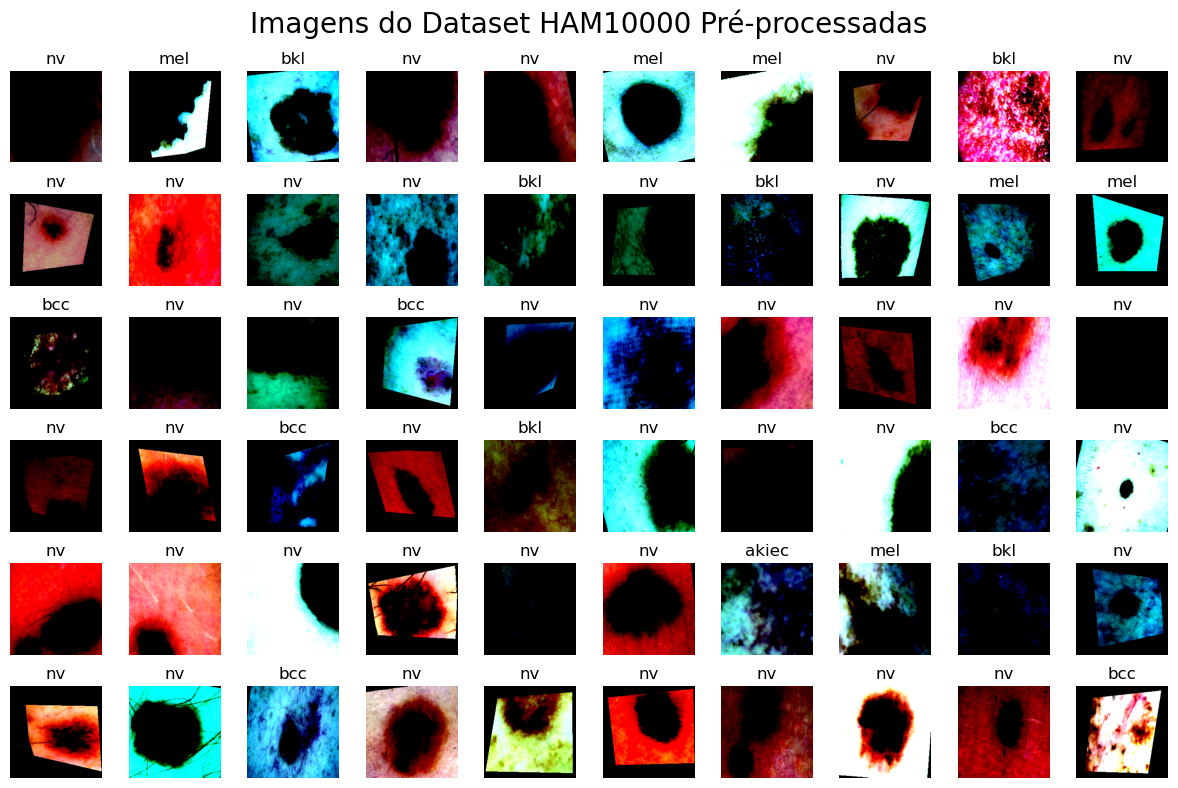

In [7]:
# Dicionário de mapeamento
label_to_class = {
    0: 'akiec',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'mel',
    5: 'nv',
    6: 'vasc'
}

# Carrega primeiro batch de imagens
images, labels = next(iter(train_data))

# Visualizando as primeiras imagens
fig, axes = plt.subplots(nrows=6, ncols=10, figsize=(12, 8))
fig.suptitle("Imagens do Dataset HAM10000 Pré-processadas", fontsize=20) 

for i, ax in enumerate(axes.flatten()):
    img = images[i].numpy()
    img = np.transpose(img, (1, 2, 0)) # Transpõe a imagem

    # Recorta os valores dos dados da imagem para o intervalo [0, 1]
    img = np.clip(img, 0, 1)

    ax.imshow(img)
    ax.set_title(label_to_class[labels[i].item()])  # Adiciona o título da imagem
    ax.axis("off")

plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajustar a distância vertical e horizontal entre as subtramas
plt.tight_layout()
plt.show()

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"></p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>1. AKIEC (Carcinoma Intraepitelial / Doença de Bowen)</strong>: É uma forma muito precoce de câncer de pele que é facilmente tratável. Aparece como manchas escamosas vermelhas ou marrons. Embora seja classificado como carcinoma de células escamosas (SCC), é menos perigoso porque é detectado muito cedo.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>2. BCC (Carcinoma Basocelular)</strong>: É o tipo mais comum de câncer de pele. Geralmente aparece como uma área elevada indolor da pele, que pode ser brilhante com pequenos vasos sanguíneos correndo sobre ela. Pode também se apresentar como uma área elevada com ulceração. Embora possa crescer e danificar o tecido ao seu redor, é improvável que se espalhe para áreas distantes ou resulte em morte.

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>3. BKL (Lesões semelhantes à ceratose benigna)</strong>: Este termo é usado para descrever uma categoria de diferentes crescimentos benignos da pele, incluindo ceratose seborreica, lentigo solar e ceratose liquenóide.

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>4. DF (Dermatofibroma)</strong>: É um nódulo fibroso benigno comum que geralmente é encontrado na pele das pernas inferiores. Não dá origem ao câncer, mas ocasionalmente pode ser confundido com dermatofibrossarcoma protuberans ou melanoma desmoplásico.

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>5. MEL (Melanoma)</strong>: É o tipo de câncer de pele mais perigoso e é mais provável que cresça e se espalhe do que os tipos mais comuns de câncer de pele. O melanoma se desenvolve nas células (melanócitos) que produzem melanina - o pigmento que dá cor à sua pele.

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>6. NV (Nevus Melanocítico)</strong>: É um crescimento benigno que se forma devido ao acúmulo de melanócitos, as células da pele que produzem melanina. Embora sejam geralmente inofensivos, em alguns casos, podem se transformar em melanoma.

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;"><strong>7. VASC (Lesão Vascular)</strong>: Este é um termo genérico usado para descrever várias condições da pele que se formam devido a problemas com os vasos sanguíneos ou linfáticos.


## 3. Modelagem ResNet34

<img src="https://www.researchgate.net/publication/368590488/figure/fig2/AS:11431281120814346@1676648971853/Architecture-of-ResNet34-29.png">

### 3.1 Funções de Agregações Testadas

#### 3.1.1 Função de Agregação AvgPool2d

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">A função AvgPool2d, por outro lado, aplica um pooling médio 2D sobre um sinal de entrada composto por vários planos de entrada. Diferentemente do MaxPool2d, que seleciona o valor máximo em cada janela do kernel, o AvgPool2d calcula a média de todos os valores dentro da janela do kernel. Isso pode ajudar a suavizar a representação \cite{goodfellow2016deep}. Matematicamente, para um tamanho de entrada $(N, C, H, W)$, a saída $(N, C, H_{out}, W_{out})$ e o tamanho do kernel $(H_{kernel}, W_{kernel})$, a função pode ser descrita como:</p>

#### $$Y(N_i, C_j, h, w) = \frac{1}{H_{kernel} * W_{kernel}} \sum_{m=0}^{H_{kernel}-1} \sum_{n=0}^{W_{kernel}-1} X(N_i, C_j, h + m, w + n)$$

<center><img src="https://puzzlelib.org/en/documentation/base/modules/img/2d_average_pooling_pa1.png"></center>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Aqui, $N_i$ é o índice do lote, $C_j$ é o índice do canal, e $(h, w)$ são as coordenadas espaciais. $m$ e $n$ são os índices que percorrem a altura e a largura do kernel, respectivamente. $H_{kernel}$ e $W_{kernel}$ são as dimensões do kernel. A operação de pooling médio calcula a média de cada janela do kernel sobre o sinal de entrada.</p>

#### 3.1.2 Função de Agregação MaxPool2d

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">A função MaxPool2d realiza uma operação de pooling máximo 2D sobre um sinal de entrada composto por vários planos de entrada. O objetivo desta operação é reduzir progressivamente o tamanho espacial da representação para reduzir a quantidade de parâmetros e computação na rede, e também para controlar o overfitting \cite{goodfellow2016deep}. Em termos matemáticos, para um tamanho de entrada $(N, C, H, W)$, a saída $(N, C, H_{out}, W_{out})$ e o tamanho do kernel $(H_{kernel}, W_{kernel})$, a função pode ser descrita como:</p>

#### $$Y(N_i, C_j, h, w) = \max_{m=0}^{H_{kernel}-1} \max_{n=0}^{W_{kernel}-1} X(N_i, C_j, h + m, w + n)$$

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Aqui, $N_i$ é o índice do lote, $C_j$ é o índice do canal, e $(h, w)$ são as coordenadas espaciais. $m$ e $n$ são os índices que percorrem a altura e a largura do kernel, respectivamente. A operação de pooling máximo seleciona o valor máximo em cada janela do kernel sobre o sinal de entrada.</p>

<center><img src="https://production-media.paperswithcode.com/methods/MaxpoolSample2.png"></center>


#### 3.1.3 Função de Agregação MedianStdDevPooling2d

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">A função MedianStdDevPooling2d é uma função de agregação personalizada que calcula a mediana mais o desvio padrão das janelas de entrada. Esta função foi projetada para capturar tanto a tendência central (mediana) quanto a variabilidade (desvio padrão) dentro de cada janela do kernel, proporcionando uma representação mais robusta e informativa dos dados.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Dada uma entrada de dimensões $(N, C, H, W)$, onde $N$ é o tamanho do lote, $C$ é o número de canais, e $H$ e $W$ são a altura e a largura da entrada, respectivamente, a função produz uma saída de dimensões $(N, C, H_{out}, W_{out})$. Além disso, a função opera com um kernel de tamanho $(H_{kernel}, W_{kernel})$. A descrição matemática da função é a seguinte:</p>

#### $$Y(N_i, C_j, h, w) = median(X(N_i, C_j, h + m, w + n)) + std(X(N_i, C_j, h + m, w + n))$$

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">para $m=0$ até $H_{kernel}-1$ e $n=0$ até $W_{kernel}-1$.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">Aqui, $N_i$ é o índice do lote, $C_j$ é o índice do canal, e $(h, w)$ são as coordenadas espaciais. $m$ e $n$ são os índices que percorrem a altura e a largura do kernel, respectivamente. $H_{kernel}$ e $W_{kernel}$ são as dimensões do kernel. A operação de pooling calcula a mediana e o desvio padrão de cada janela do kernel sobre o sinal de entrada e retorna a soma de ambos.</p>

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">A mediana é calculada como:</p>

#### $$\text{mediana}(X) = \begin{cases} X\left(\frac{n+1}{2}\right), & \text{se } n \text{ é ímpar} \\
\frac{X\left(\frac{n}{2}\right) + X\left(\frac{n}{2} + 1\right)}{2}, & \text{se } n \text{ é par}
\end{cases}$$

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">E o desvio padrão é calculado como:</p>

#### $$std(X) = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i - \bar{X})^2}$$

<p style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333; text-align: justify;">onde $n$ é o número de elementos em $X$, $X_i$ é o i-ésimo elemento de $X$, e $\bar{X}$ é a média de $X$.</p>

### 3.2 Carrega Modelo Pré-treinado

In [8]:
def load_resnet34(pretrained=True):
    # Carregando modelo
    modelo         = resnet34(pretrained=pretrained)
    modelo.maxpool = nn.AvgPool2d(kernel_size=3, stride=2, padding=1)
    
    # Habilitando ajuste fino
    for param in modelo.parameters():
        param.requires_grad = True
        
    # "Cortando a cabeça do modelo"
    modelo.fc = nn.Linear(512, 7, bias=True)
    
    # Retornando o modelo pré-treinado
    return modelo

### 3.2 Estrutura do Processo de Treinamento

In [9]:
class ResNet34(LightningModule):
    
    # Método construtor
    def __init__(self):
        super().__init__()
        self.model = load_resnet34()
        self.acc   = Accuracy(task="multiclass", num_classes=7).to(device)
        
    # Método forward
    def forward(self, x):
        return self.model(x)
    
    # Método de treinamento
    def training_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.cross_entropy(logits, y)
        acc    = self.acc(logits, y)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("train_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
        return loss
    
    # Método de validação
    def validation_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.cross_entropy(logits, y)
        acc    = self.acc(logits, y)
        self.log("valid_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("valid_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
    
    # Método de teste
    def test_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.cross_entropy(logits, y)
        acc    = self.acc(logits, y)
        self.log("test_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("test_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
        
    # Método de configurações de otimização
    def configure_optimizers(self):
        # Otimizador
        optimizer    = optim.AdamW(params=self.parameters(), lr=0.001, weight_decay=0.01)
        
        # Lr Scheduler
        lr_scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.5)
        
        # Retornando as configurações de otimização
        return {"optimizer": optimizer, "lr_scheduler": {"scheduler": lr_scheduler, "interval": "epoch"}}
    
# Instanciando o modelo ResNet34
modelo = ResNet34()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 188MB/s] 


### 3.3 Configurações de Treinamento

In [10]:
# Definindo o checkpoint
checkpoint_callback = ModelCheckpoint(
    dirpath="./best",
    monitor="valid_acc",
    mode="max",
    filename="best-model",
    save_top_k=1,
    verbose=True
)

# Definindo o trainador
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,
    max_epochs=100,
    logger=CSVLogger(save_dir="./loggs"),
    callbacks=[EarlyStopping(monitor="valid_acc", patience=3, mode="max"), checkpoint_callback]
)

INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs


### 3.4 Treinando ResNet34

In [11]:
# Realizando o treinamento
trainer.fit(modelo, train_dataloaders=train_data, val_dataloaders=valid_data)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type               | Params
---------------------------------------------
0 | model | ResNet             | 21.3 M
1 | acc   | MulticlassAccuracy | 0     
---------------------------------------------
21.3 M    Trainable params
0         Non-trainable params
21.3 M    Total params
85.153    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 60: 'valid_acc' reached 0.67404 (best 0.67404), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 120: 'valid_acc' reached 0.72909 (best 0.72909), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 180: 'valid_acc' reached 0.75206 (best 0.75206), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 240: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 300: 'valid_acc' reached 0.75899 (best 0.75899), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 360: 'valid_acc' reached 0.76029 (best 0.76029), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 420: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 480: 'valid_acc' reached 0.78110 (best 0.78110), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 540: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 600: 'valid_acc' reached 0.78153 (best 0.78153), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 660: 'valid_acc' reached 0.78240 (best 0.78240), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 720: 'valid_acc' reached 0.79757 (best 0.79757), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 12, global step 780: 'valid_acc' reached 0.79844 (best 0.79844), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 13, global step 840: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 14, global step 900: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 15, global step 960: 'valid_acc' reached 0.80321 (best 0.80321), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 16, global step 1020: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 17, global step 1080: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 18, global step 1140: 'valid_acc' reached 0.80798 (best 0.80798), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 19, global step 1200: 'valid_acc' reached 0.81491 (best 0.81491), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 20, global step 1260: 'valid_acc' reached 0.82575 (best 0.82575), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 21, global step 1320: 'valid_acc' reached 0.82835 (best 0.82835), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 22, global step 1380: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 23, global step 1440: 'valid_acc' reached 0.83138 (best 0.83138), saving model to '/kaggle/working/best/best-model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 24, global step 1500: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 25, global step 1560: 'valid_acc' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 26, global step 1620: 'valid_acc' was not in top 1


## 4. Avaliação do Modelo

### 4.1 Desempenho do Modelo para Dados de Validação

In [12]:
# Carregando os pesos do modelo
checkpoint = torch.load("/kaggle/working/best/best-model.ckpt")
modelo.load_state_dict(checkpoint['state_dict'])

# Rsultados para dados de validação
trainer.test(modelo, valid_data)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8313827514648438     │
│         test_loss         │    0.45609793066978455    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.45609793066978455, 'test_acc': 0.8313827514648438}]

### 4.2 Carregando e Salvando as Métricas de Treino e Validação

In [13]:
def load_and_process_metrics(trainer):
    # Carrega métricas de treinamento e validação
    metricas = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
    metricas.set_index('epoch', inplace=True)

    # Deletando os passos individuais
    del metricas["step"]; del metricas['test_loss']; del metricas['test_acc']

    # Removendo valores NaN
    df_val_loss_acc    = metricas[['valid_loss', 'valid_acc']].dropna()
    df_train_loss_acc  = metricas[['train_loss', 'train_acc']].dropna()

    # Concatenando os dataframes
    metricas = df_train_loss_acc.join(df_val_loss_acc)
    
    return metricas

# Carregando as métricas de treino e validação por época
metricas = load_and_process_metrics(trainer)

# Salvando arquivo csv com as métricas de validação
metricas.to_csv('metricas.csv', index=False)

### 4.3 Mapas de Características

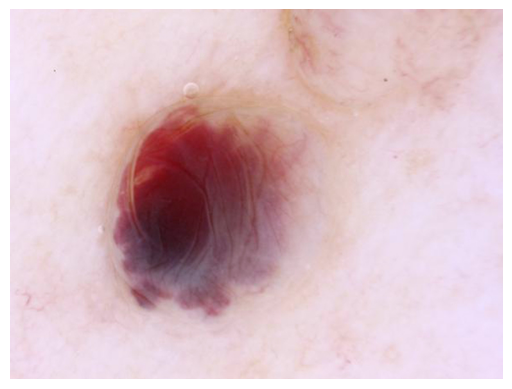

In [14]:
# Carregar a imagem
img = Image.open("/kaggle/working/valid/vasc/ISIC_0028146.jpg")

# Visualizar a imagem
plt.imshow(img)
plt.axis('off')  # para remover os eixos
plt.savefig('img_original.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
def load_image(image_path):
    # Carregar a imagem
    return Image.open(image_path)

def apply_transformations(img):
    # Definir as transformações
    transform = Compose([
        Resize((224, 224)),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Valores padrão para imagens RGB
    ])
    # Aplicar as transformações na imagem
    return transform(img)

class CustomDataset(Dataset):
    def __init__(self, img):
        self.img = img

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        return self.img

def create_dataloader(img):
    # Criar o conjunto de dados personalizado
    dataset = CustomDataset(img)
    # Criar o DataLoader
    return DataLoader(dataset, batch_size=1)

# Uso:
img = load_image("/kaggle/working/valid/vasc/ISIC_0028146.jpg")
img_transformed = apply_transformations(img)
dataloader = create_dataloader(img_transformed)

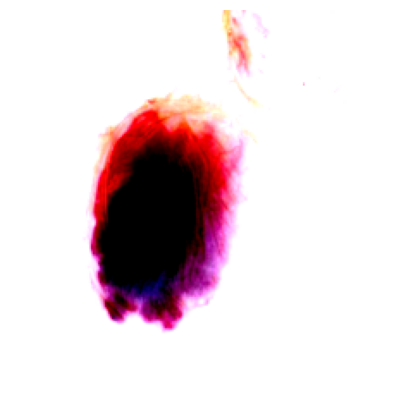

In [16]:
# Carregando imagem de entrada
img = dataloader.dataset[0].numpy()
img = np.transpose(img, (1, 2, 0))

# Visualizando imagem
plt.figure(figsize=(10, 5))    # Criar uma nova figura
plt.axis('off') # Remover os eixos
plt.imshow(img) # Mostrar a imagem
plt.savefig('img_padronizada.png', dpi=300, bbox_inches='tight')
plt.show()

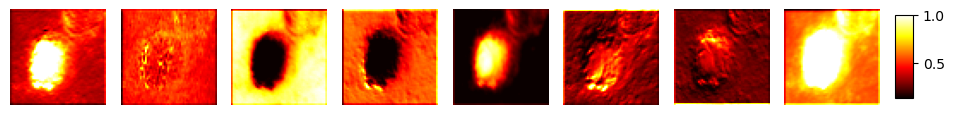

In [17]:
def compute_output(modelo, data):
    # Camadas da arquitetura
    conv1   = modelo.model.conv1
    bn1     = modelo.model.bn1 
    relu    = modelo.model.relu 
    maxpool = modelo.model.maxpool

    # Saída da função de agregação MaxPool2d
    output = maxpool(relu(bn1(conv1(data.view(1, 3, 224, 224)))))

    return output

output = compute_output(modelo, dataloader.dataset[0])

def visualize_features(output, labels):
    # Visualizando as primeiras imagens
    fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(9, 1.5))  # Ajuste o número de linhas e colunas conforme necessário
    for i, ax in enumerate(axes.flatten()):
        if i < output.shape[1]:  # Certifique-se de que não estamos tentando visualizar mais canais do que existem
            img = output[0, i].detach().numpy()  # Selecione o canal i da primeira imagem
            img = np.transpose(img, (0, 1))  # Transpõe a imagem

            # Recorta os valores dos dados da imagem para o intervalo [0, 1]
            img = np.clip(img, 0, 1)

            im = ax.imshow(img, cmap='hot')  # Use uma colormap de mapa de calor para visualizar melhor os canais individuais
            ax.axis("off")

    # Adicione uma única barra de cores grande ao lado da figura
    cbar_ax = fig.add_axes([1, 0.23, 0.02, 0.55])  # Ajuste a posição e o tamanho conforme necessário
    fig.colorbar(im, cax=cbar_ax)

    plt.subplots_adjust(hspace=0.01, wspace=0.01)  # Ajustar a distância vertical e horizontal entre as subtramas
    plt.tight_layout()
    plt.savefig('resnet34_AvgPool2d.png', dpi=300, bbox_inches='tight')
    plt.show()

# Visualizar as características
visualize_features(output, labels)

### 4.3 Validação Cruzada

In [19]:
# Crie um DataFrame para armazenar os resultados
results = pd.DataFrame(columns=['Fold', 'Accuracy', 'Num_Images'])

# Obtenha os rótulos do seu conjunto de validação
labels = [label for _, label in valid_data.dataset]

# Crie os índices para a validação cruzada
skf = StratifiedKFold(n_splits=30)
splits = list(skf.split(np.zeros(len(labels)), labels))

# Crie um DataLoader para cada fold
fold_dataloaders = [DataLoader(Subset(valid_data.dataset, test_idx), batch_size=valid_data.batch_size) for _, test_idx in splits]

# Agora você pode iterar sobre fold_dataloaders para avaliar seu modelo em cada fold
for i, fold_data in enumerate(fold_dataloaders):
    print(f"Avaliando fold {i+1}")
    # Avalie o modelo no fold atual e obtenha a acurácia
    metrics = trainer.test(modelo, fold_data)
    accuracy = metrics[0]['test_acc']
    num_images = len(fold_data.dataset)
    # Adicione os resultados ao DataFrame
    results = results.append({'Fold': i+1, 'Accuracy': accuracy, 'Num_Images': num_images}, ignore_index=True)

# Salve o DataFrame em um arquivo CSV
results.to_csv('results.csv', index=False)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 1


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8311688303947449     │
│         test_loss         │    0.4893723428249359     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 2


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8441558480262756     │
│         test_loss         │    0.4951227307319641     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 3


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8311688303947449     │
│         test_loss         │    0.4290999472141266     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 4


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8181818127632141     │
│         test_loss         │    0.39833277463912964    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 5


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7922077775001526     │
│         test_loss         │    0.5990105867385864     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 6


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7402597665786743     │
│         test_loss         │    0.7018043994903564     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 7


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7792207598686218     │
│         test_loss         │    0.6452971696853638     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 8


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8051947951316833     │
│         test_loss         │    0.4869939684867859     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 9


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8051947951316833     │
│         test_loss         │    0.5252983570098877     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 10


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8961039185523987     │
│         test_loss         │    0.2936764359474182     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 11


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8571428656578064     │
│         test_loss         │     0.419145792722702     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 12


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8831169009208679     │
│         test_loss         │    0.3745478391647339     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 13


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8051947951316833     │
│         test_loss         │    0.5089415311813354     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 14


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8311688303947449     │
│         test_loss         │    0.5771447420120239     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 15


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8181818127632141     │
│         test_loss         │    0.46666717529296875    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 16


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8051947951316833     │
│         test_loss         │    0.5081599950790405     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 17


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8441558480262756     │
│         test_loss         │    0.39795804023742676    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 18


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8181818127632141     │
│         test_loss         │    0.5245562195777893     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 19


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7662337422370911     │
│         test_loss         │    0.5452106595039368     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 20


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8831169009208679     │
│         test_loss         │    0.36005863547325134    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 21


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9090909361839294     │
│         test_loss         │    0.28848761320114136    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 22


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8701298832893372     │
│         test_loss         │    0.37356317043304443    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 23


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8571428656578064     │
│         test_loss         │    0.43595585227012634    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 24


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8181818127632141     │
│         test_loss         │    0.42683762311935425    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 25


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8441558480262756     │
│         test_loss         │    0.4092678725719452     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 26


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8311688303947449     │
│         test_loss         │     0.42745441198349      │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 27


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8051947951316833     │
│         test_loss         │    0.4989164173603058     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 28


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7894737124443054     │
│         test_loss         │    0.4956896901130676     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 29


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8421052694320679     │
│         test_loss         │    0.4638326168060303     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Avaliando fold 30


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7368420958518982     │
│         test_loss         │    0.6079955101013184     │
└───────────────────────────┴───────────────────────────┘